In [1]:
import pandas as pd
from itertools import combinations
import os
from bidict import bidict
import pickle
import lfp_analysis.LFP_recording as LFP_recording
import lfp_analysis.LFP_collection as LFP_collection
import lfp_analysis.preprocessor as preprocessor
import importlib
importlib.reload(LFP_recording)
importlib.reload(preprocessor)

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

c:\Users\megha\anaconda3\envs\lfp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel(r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\channel_mapping_sme.xlsx")
spike_cols = [col for col in df.columns if 'spike_interface_' in col.lower()]

# Extract brain regions from column names
# Assumes format 'spike_interface_REGION'
brain_regions = [col.split('spike_interface_')[1] for col in spike_cols]

# Create nested dictionary
subject_to_channel_dict = {}

for _, row in df.iterrows():
    subject = row['Subject'].astype(str)
    # Initialize inner dictionary for this subject
    subject_to_channel_dict[subject] = {}
    
    # Populate inner dictionary with brain region: spike value pairs
    for col, region in zip(spike_cols, brain_regions):
        subject_to_channel_dict[subject][region] = int(row[col])
print(subject_to_channel_dict)

{'1.1': {'mPFC': 19, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '1.2': {'mPFC': 26, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '1.3': {'mPFC': 9, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.1': {'mPFC': 15, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.2': {'mPFC': 7, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.3': {'mPFC': 19, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.4': {'mPFC': 10, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '3.1': {'mPFC': 25, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '3.2': {'mPFC': 26, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '3.3': {'mPFC': 26, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '4.1': {'mPFC': 25, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '4.4': {'mPFC': 25, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}}


In [3]:
data_path = r'D:\cups\data'
behavior_dicts = unpickle_this("cups_behavior_dicts.pkl")
print(behavior_dicts.keys())
recording_to_subject = {}
recording_to_behavior_dict = {}
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('merged.rec'):
            subject = str(int((file.split("_")[0]))/10)
            
            if subject in behavior_dicts.keys():
                recording_to_subject[file] = subject
                behavior_dict = behavior_dicts[subject]
                recording_to_behavior_dict[file] = behavior_dict


trodes_directory = r"C:\Users\megha\Downloads\Trodes_2-5-2_Windows64\Trodes_2-5-2_Windows64"
            

dict_keys(['1.1', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '4.1', '4.4'])


In [4]:
collection = LFP_collection.LFPCollection(recording_to_behavior_dict, subject_to_channel_dict, data_path, recording_to_subject, 4, trodes_directory)
#roughly 13 min for 9 recordings

Processing 11_cups_p4_merged.rec


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\trodes\read_exported.py:168: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


Found first timestamp
Processing 13_cups_p4_merged.rec
Found first timestamp
Processing 21_cups_p4_merged.rec
Found first timestamp
Processing 22_cups_p4_merged.rec
Found first timestamp
Processing 23_cups_p4_merged.rec
Found first timestamp
Processing 24_cups_p4_merged.rec
Found first timestamp
Processing 32_cups_p4_merged.rec
Found first timestamp
Processing 41_cups_p4_merged.rec
Found first timestamp
Processing 44_cups_p4_merged.rec
Found first timestamp


In [5]:
collection.process()

  0%|          | 0/9 [00:00<?, ?it/s]

processing 11_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 11%|█         | 1/9 [01:08<09:09, 68.74s/it]

Coherence calcualatd
processing 13_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 22%|██▏       | 2/9 [02:43<09:50, 84.33s/it]

Coherence calcualatd
processing 21_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 33%|███▎      | 3/9 [03:33<06:50, 68.40s/it]

Coherence calcualatd
processing 22_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 44%|████▍     | 4/9 [04:42<05:43, 68.79s/it]

Coherence calcualatd
processing 23_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 56%|█████▌    | 5/9 [05:32<04:07, 61.86s/it]

Coherence calcualatd
processing 24_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 67%|██████▋   | 6/9 [06:07<02:38, 52.82s/it]

Coherence calcualatd
processing 32_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 78%|███████▊  | 7/9 [06:39<01:31, 45.83s/it]

Coherence calcualatd
processing 41_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


 89%|████████▉ | 8/9 [07:11<00:41, 41.59s/it]

Coherence calcualatd
processing 44_cups_p4_merged.rec
RMS Traces calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
sampling freq 1000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 1000
half bandwidth 2
duration 1
step 0.5


100%|██████████| 9/9 [07:42<00:00, 51.41s/it]

Coherence calcualatd


In [114]:
# for lfp_recording in collection.lfp_recordings:
#     print(lfp_recording.power.shape)
#     print('rms', lfp_recording.rms_traces.shape[1]/1000/60)
#     print('raw', lfp_recording.traces.shape)

test_recording = collection.lfp_recordings[0]
rms_traces = test_recording.rms_traces
multi_t = Multitaper(
        # multitaper takes in a time_series that is time by signals (regions)
        time_series=rms_traces.T,
        sampling_frequency=1000,
        time_halfbandwidth_product=2,
        time_window_duration=1,
        time_window_step=0.5,
    )

connectivity = Connectivity.from_multitaper(multi_t)
frequencies = connectivity.frequencies
power = connectivity.power()

In [53]:
print(power.shape)
print(rms_traces.shape)

(5189, 500, 5)
(5, 2595089)


In [ ]:
import lfp_analysis.connectivity_wrapper as wrapper
grangers = wrapper.calculate_grangers(test_recording.rms_traces, 1000, 2, 1, 0.5)

sampling freq 1000
half bandwidth 2
duration 1
step 0.5


Maximum iterations reached. 5101 of 5189 converged
Maximum iterations reached. 5186 of 5189 converged
Maximum iterations reached. 5188 of 5189 converged
Maximum iterations reached. 5187 of 5189 converged
Maximum iterations reached. 5177 of 5189 converged
Maximum iterations reached. 5187 of 5189 converged
Maximum iterations reached. 5187 of 5189 converged


Text(0, 0.5, 'Power')

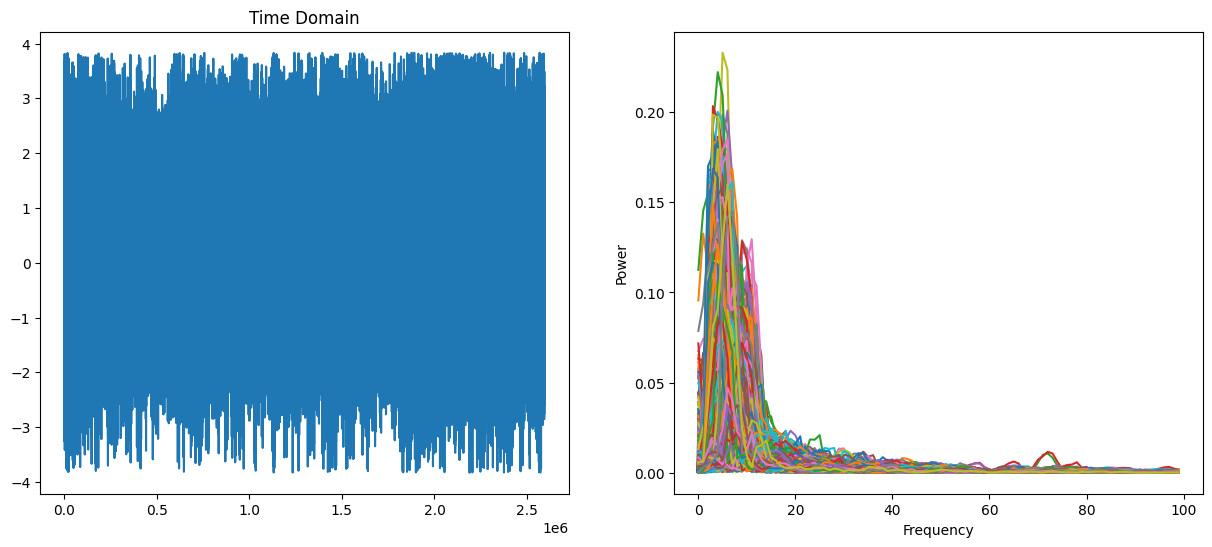

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(rms_traces[0,:].T)
axes[0].set_title("Time Domain")


axes[1].plot(connectivity.frequencies[0:100], power[:,0:100,0].T)
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Power")

In [7]:
from spectral_connectivity import Multitaper, Connectivity
import lfp_analysis.Analysis as analysis
import matplotlib.pyplot as plt
importlib.reload(LFP_recording)
importlib.reload(preprocessor)
importlib.reload(analysis)



<module 'lfp_analysis.Analysis' from 'c:\\Users\\megha\\Documents\\GitHub\\diff_fam_social_memory_ephys\\lfp\\lfp_analysis\\Analysis.py'>

All set to analyze


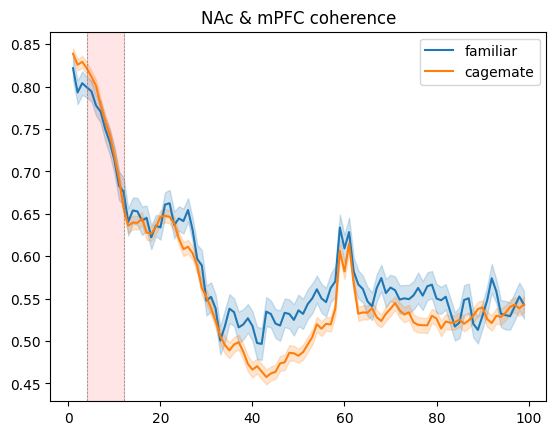

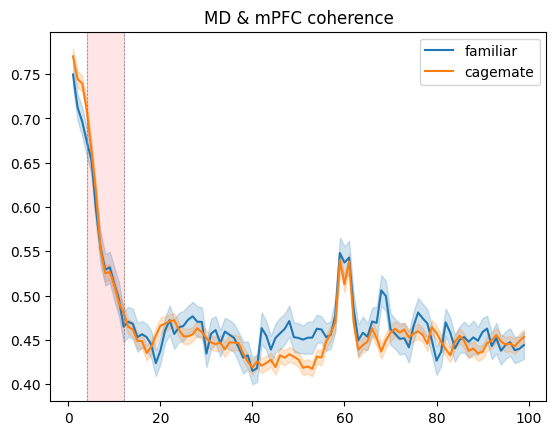

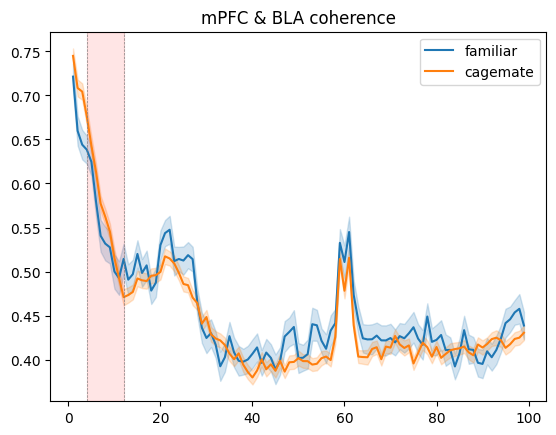

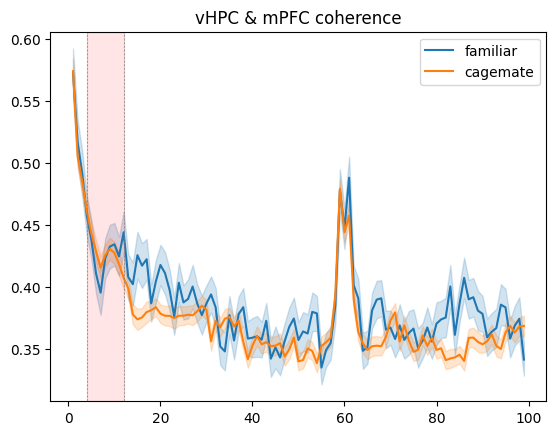

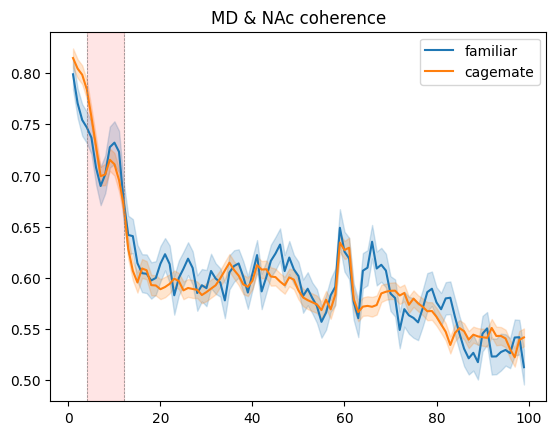

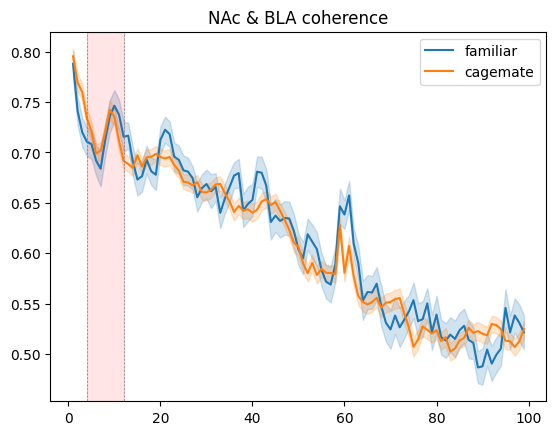

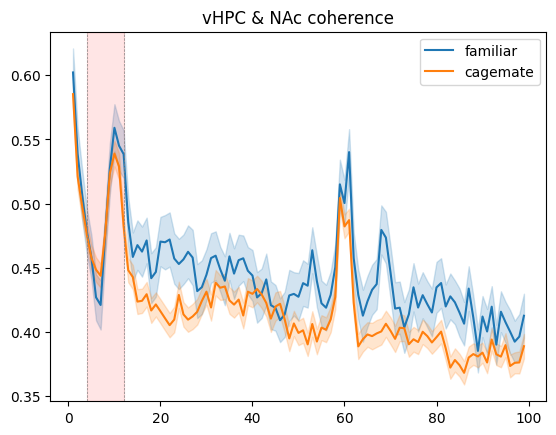

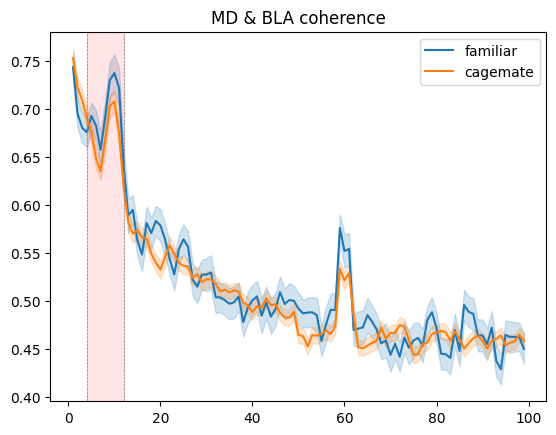

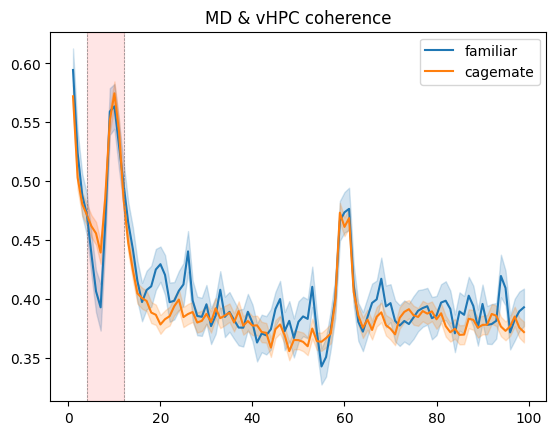

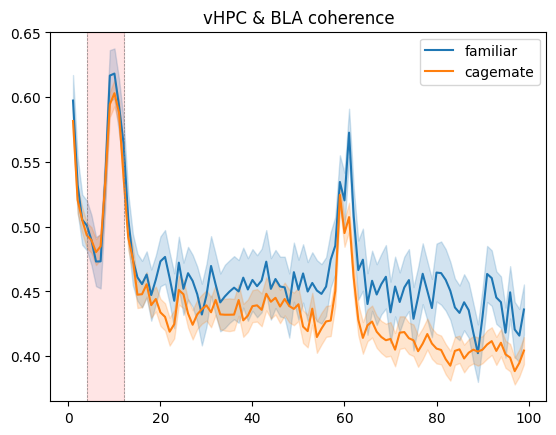

In [9]:
test = analysis.LFPAnalysis(collection.lfp_recordings)
event_averages = test.average_events(events = ['familiar', 'cagemate'], mode = 'coherence', 
                baseline = None, plot = True)



In [ ]:
event_averages = []
event_sems = []
recordings = []
from matplotlib.patches import Patch 
import numpy as np
from scipy import stats
# Define the events
events = ['cagemate', 'novel', 'recall']
coherence_pair = ['mPFC','vHPC']
index1, index2 = list(test.coherence_pairs_dict[frozenset({coherence_pair})])
freq_range = [12, 30]

# Loop through each recording and each event
for recording in collection.lfp_recordings:
    rec_info = recording.merged_rec + recording.subject
    recordings.append(rec_info)
    for event in events:
        event_average = test.__get_event_averages__(recording,
                                                             event=event,
                                                             mode='coherence',
                                                             event_len=None,
                                                             pre_window=0,
                                                             post_window=0)
        event_array = np.array(event_average)
        event_average = np.nanmean(event_array[:, freq_range[0]:freq_range[1], index1, index2], axis=1)
        event_mean = np.nanmean(np.array(event_average[:]), axis=0)
        event_sem = stats.sem(np.array(event_average), axis=0, nan_policy='omit')
        event_averages.append(event_mean)
        event_sems.append(event_sem)

# Define the number of bars and their positions
num_recordings = len(test.collection)
num_events = len(events)
bar_width = 0.2
x = np.arange(num_recordings)

# Define colors for each event
colors = ['skyblue', 'lightgreen', 'lightcoral']
color_map = {events[i]: colors[i] for i in range(num_events)}

# Create the bar plot
plt.figure(figsize=(10, 8))

# Plot each bar with appropriate color and error bars
for i, recording in enumerate(recordings):
    for j, event in enumerate(events):
        idx = i * num_events + j
        plt.barh(x[i] + j * bar_width, event_averages[idx], xerr=event_sems[idx], 
                 capsize=5, color=color_map[event], edgecolor='black', height=bar_width,
                 label=event if i == 0 else '')

# Add labels and title
plt.ylabel('Recordings', fontsize=14)
plt.xlabel('Value', fontsize=14)
plt.title(f'Freq {freq_range} {coherence_pair} coherence', fontsize=16)

# Set custom y-ticks
ytick_positions = x + bar_width
plt.yticks(ytick_positions, recordings)

# Add a legend
handles = [Patch(color=color, label=event) for event, color in color_map.items()]
plt.legend(handles=handles, fontsize=12)

# Customize the plot (optional)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [105]:
rec_tester= collection.lfp_recordings[0]
print(rec_tester.coherence.shape)
len(rec_tester.behavior_dict['cagemate'])
len(rec_tester.behavior_dict['novel'])


(5189, 500, 5, 5)


18

woo
woo
woo
woo
woo
woo
woo
woo
woo


In [49]:
len(event_averages['familiar'])

0

In [59]:
trodes_directory

'C:\\Users\\megha\\Downloads\\Trodes_2-5-2_Windows64\\Trodes_2-5-2_Windows64'

In [65]:
import lfp_analysis.Analysis as analysis
import lfp_analysis.connectivity_wrapper as wrapper
importlib.reload(analysis)
importlib.reload(preprocessor)
importlib.reload(LFP_recording)
importlib.reload(wrapper)

<module 'lfp_analysis.connectivity_wrapper' from 'c:\\Users\\megha\\Documents\\GitHub\\diff_fam_social_memory_ephys\\lfp\\lfp_analysis\\connectivity_wrapper.py'>

In [60]:
merged_rec_path = r"D:\cups\data\11_cups_p4.rec\11_cups_p4_merged.rec"
rec_test = LFP_recording.LFPRecording(subject = '1.1', 
                                      behavior_dict=behavior_dicts['1.1'], 
                                      channel_dict=subject_to_channel_dict['1.1'], 
                                      merged_rec_path=merged_rec_path,
                                      trodes_directory=trodes_directory)


Processing 11_cups_p4_merged.rec


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\trodes\read_exported.py:168: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


Found first timestamp


In [66]:
rec_test.process(threshold = 4)

processing 11_cups_p4_merged.rec
RMS Traces calculated
sampling freq 20000
half bandwidth 2
duration 1
step 0.5
sampling freq 20000
half bandwidth 2
duration 1
step 0.5
Power Calculated
sampling freq 20000
half bandwidth 2
duration 1
step 0.5
Coherence calcualatd


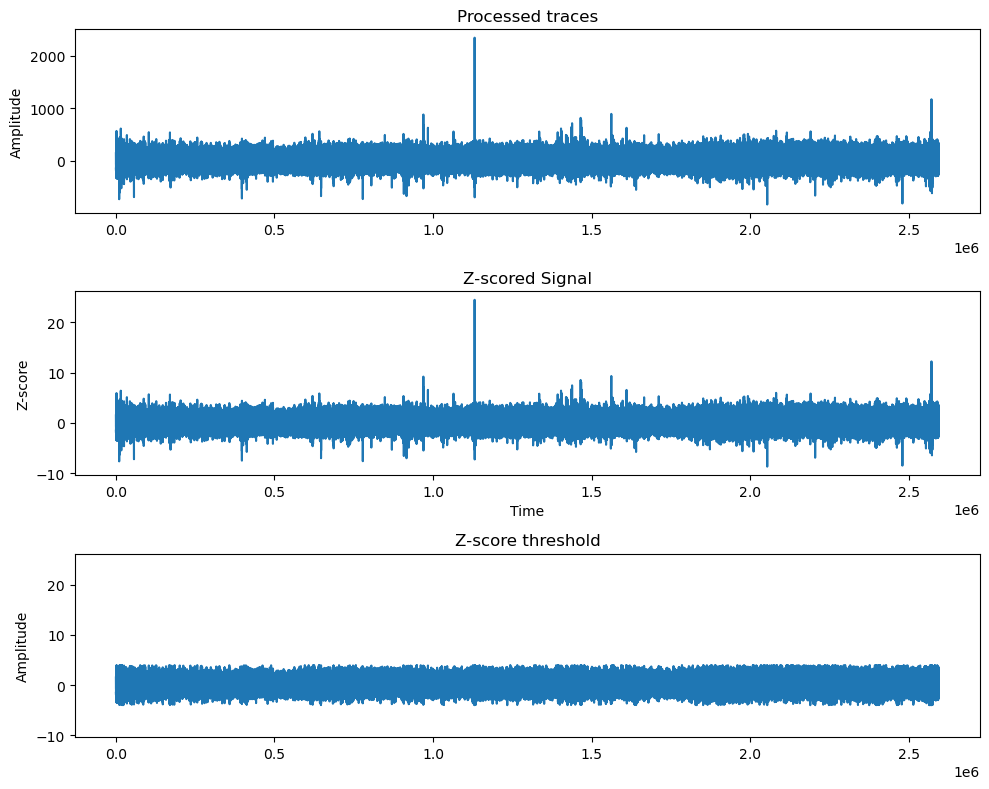

In [ ]:
I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD = 4
rec_test.plot_to_find_threshold(threshold = I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD)

In [ ]:
rec_test.process(I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD)

(10000, 5)


Text(0, 0.5, 'Power')

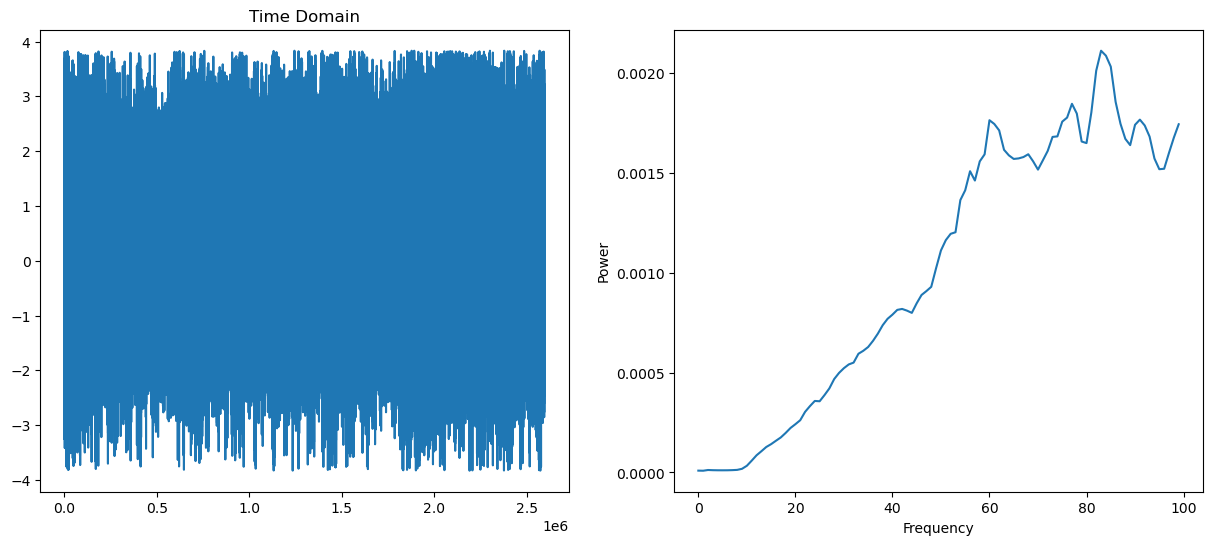

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(rec_test.rms_traces[0].T)
axes[0].set_title("Time Domain")
#connectivity.power.() = [timebins, frequencies, signal]
average_power = np.mean(rec_test.power, axis = 0)
print(average_power.shape)
axes[1].plot(rec_test.frequencies[0:100], average_power[0:100, 0])
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Power")

In [ ]:
print(rec_test.frequencies[0:5])

[0. 1. 2. 3. 4.]


(10000, 5)


Text(0, 0.5, 'Power')

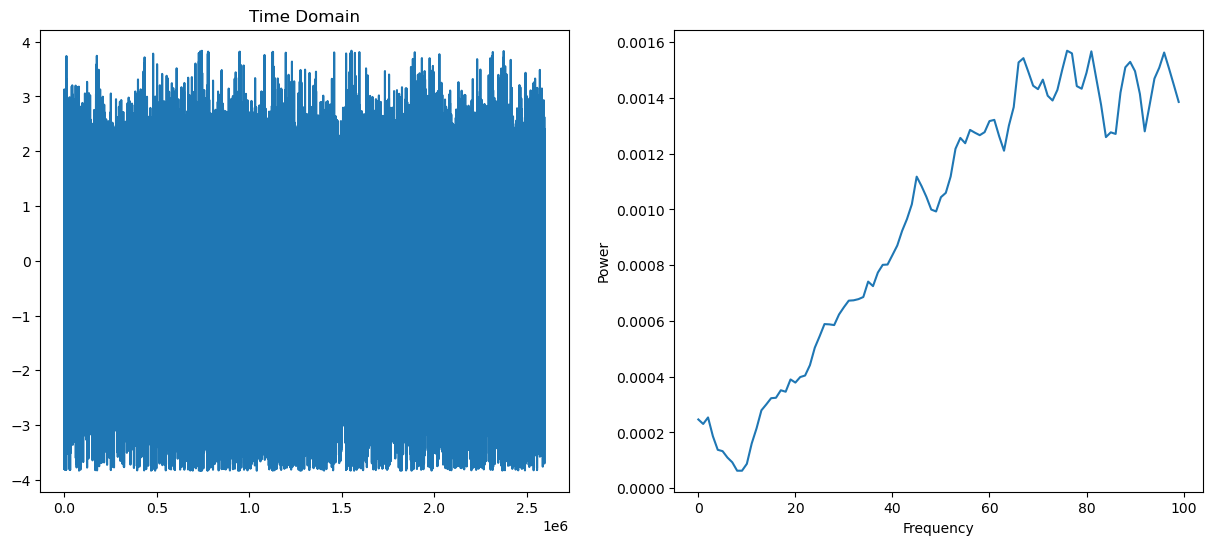

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(rec_test.rms_traces[4].T)
axes[0].set_title("Time Domain")
#connectivity.power.() = [timebins, frequencies, signal]
average_power = np.mean(rec_test.power, axis = 0)
print(average_power.shape)
axes[1].plot(rec_test.frequencies[0:100], average_power[0:100, 4])
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Power")